<a href="https://colab.research.google.com/github/aydawudu/RNN/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor=Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1) ))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences=True ))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences=True ))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences=False ))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 135ms/step - loss: 0.0572
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0039
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']), axis= 0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60: ].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)


In [ ]:
#Creating a data structure with 60 timesteps
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

#Reshaping to 3_D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#To predict
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[756.10895]
 [753.0799 ]
 [754.13947]
 [756.45905]
 [760.25385]
 [766.33685]
 [771.1939 ]
 [771.9288 ]
 [771.0783 ]
 [770.7826 ]
 [771.29144]
 [771.7549 ]
 [771.83997]
 [772.38477]
 [773.2332 ]
 [778.403  ]
 [785.95886]
 [793.11365]
 [795.4509 ]
 [788.3475 ]]


### Visualising the results

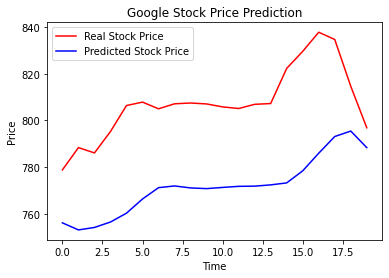

In [ ]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
